<a href="https://colab.research.google.com/github/VellStraggler/BloomCodeCamp-be-a-starter/blob/main/bike_project/wells_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Updated 2/21/2025
# Load some test data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
df.head()
STUPID = 'YOU ARE THE STUPID'
print(STUPID)

YOU ARE THE STUPID


In [3]:
df.describe()

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000
mean,11.501098,90.434612,249.193625,15.376487,14.659325,0.636624,13.100614,1.405441,2.495799,0.030300,0.684312
std,6.921864,128.655621,258.267544,9.749467,11.428324,0.190328,7.857600,0.683450,1.101152,0.171412,0.464791
min,0.000000,0.000000,0.000000,-14.700000,-24.000000,0.088900,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,7.000000,48.000000,7.600000,5.400000,0.484100,7.700000,1.000000,2.000000,0.000000,0.000000
50%,12.000000,36.000000,180.000000,16.000000,16.000000,0.640900,12.200000,1.000000,2.000000,0.000000,1.000000
75%,18.000000,122.000000,360.000000,23.500000,23.500000,0.798800,17.500000,2.000000,3.000000,0.000000,1.000000
max,23.000000,1244.000000,1702.000000,40.500000,49.600000,1.000000,69.800000,4.000000,4.000000,1.000000,1.000000


In [4]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [11]:
# fix your columns to be model-readable here
df["dteday"] = pd.to_datetime(df["dteday"])
df["year"] = df["dteday"].dt.year
df["month"] = df["dteday"].dt.month


In [14]:
X = df.drop(columns=["casual","registered","dteday"])
y = df["casual"] + df["registered"]

In [17]:
# look at data, now it is all numeric
X


,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year,month
0,0.0,3.0,3.0,0.7957,0.8,1,1,0,0,2011,1
1,1.0,1.7,1.7,0.8272,0.8,1,1,0,0,2011,1
2,2.0,1.9,1.9,0.8157,1.1,1,1,0,0,2011,1
3,3.0,2.5,2.5,0.7831,0.8,1,1,0,0,2011,1
4,4.0,2.0,2.0,0.8075,1.1,1,1,0,0,2011,1
...,...,...,...,...,...,...,...,...,...,...,...
112470,19.0,10.2,10.2,0.4516,8.4,2,4,0,1,2023,10
112471,20.0,8.9,7.5,0.5268,9.3,1,4,0,1,2023,10
112472,21.0,7.7,6.4,0.5756,7.8,1,4,0,1,2023,10
112473,22.0,8.0,8.0,0.5604,0.0,1,4,0,1,2023,10


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
y_train

,0
95962,138
34637,191
5954,1
109932,34
103772,1029
...,...
76820,100
110268,51
103694,18
860,67


In [20]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
# len(X_train[0])

In [21]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,073 (199.50 KB)

 Trainable params: 51,073 (199.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 90521.5547 - mse: 90521.5547 - val_loss: 51991.0430 - val_mse: 51991.0430
Epoch 2/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 54481.7148 - mse: 54481.7148 - val_loss: 43720.9922 - val_mse: 43720.9922
Epoch 3/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 47048.6484 - mse: 47048.6484 - val_loss: 39248.8281 - val_mse: 39248.8281
Epoch 4/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 44027.9414 - mse: 44027.9414 - val_loss: 36624.1406 - val_mse: 36624.1406
Epoch 5/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 41494.4688 - mse: 41494.4688 - val_loss: 35082.8789 - val_mse: 35082.8789
Epoch 6/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 39223.4336 - mse: 39223.4336 - val_loss: 33867.5938 - val_mse: 33867.5938
Epoch 7/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 37837.3945 - mse: 37837.3945 - val_loss: 31423.8652 - val_mse: 31423.8652
Epoch 8/2000
2559/2559 ━━━━━━

KeyboardInterrupt: 

In [29]:
history

# Updated 2/21/2025
# Load some test data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
df.head()
STUPID = 'YOU ARE STUPID'
print(STUPID)
# Updated 2/21/2025
# Load some test data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
df.head()
STUPID = 'YOU ARE THE STUPID'
print(STUPID)
df.describe()
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics imp

In [30]:
# h = hist
hist = history.reset_index()
# h

NameError: name 'history' is not defined

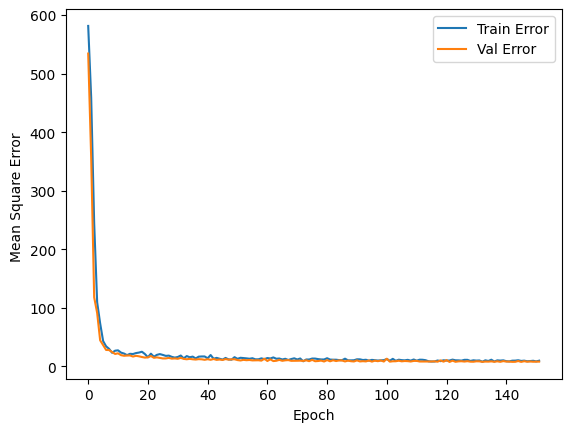

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


In [ ]:
predictions

array([[32. ],
       [29.5],
       [21.2],
       [15. ],
       [13.7],
       [25.2],
       [26.8],
       [12.9],
       [17. ],
       [19.6],
       [14.1],
       [36.1],
       [24. ],
       [14.1],
       [22.7],
       [13. ],
       [29.8],
       [20.9],
       [14.6],
       [36.2],
       [21.8],
       [19.2],
       [25. ],
       [28.2],
       [15.8],
       [42.4],
       [22.6],
       [23. ],
       [19. ],
       [13.2],
       [28.1],
       [37.2],
       [17.4],
       [23.8],
       [33.6],
       [13.2],
       [21.8],
       [18.1],
       [14.2],
       [24. ],
       [23.6],
       [26.9],
       [20.1],
       [12.4],
       [22.6],
       [33.1],
       [23.8],
       [20.7],
       [22.8],
       [26.5],
       [21.5],
       [32.5],
       [31.2],
       [12.9],
       [25.6],
       [13.1],
       [17. ],
       [27.5],
       [22.8],
       [18.5],
       [14.1],
       [31.1],
       [22.2],
       [19.7],
       [19.2],
       [23.2],
       [22

In [ ]:

result = root_mean_squared_error(y_test, predictions)
result

2.2609548333696856

In [ ]:

r2 = r2_score(y_test,predictions)
r2

0.910928815554296

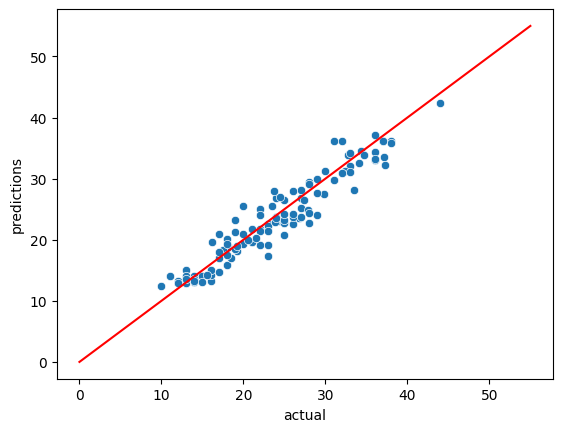

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()